In [1]:
# import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset and check info on the columns
df=pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
# drop non-informative columns
df=df.drop(columns=['Id'],axis=1)
df=df.drop(columns=['MiscFeature'],axis=1)
df=df.drop(columns=['MiscVal'],axis=1)

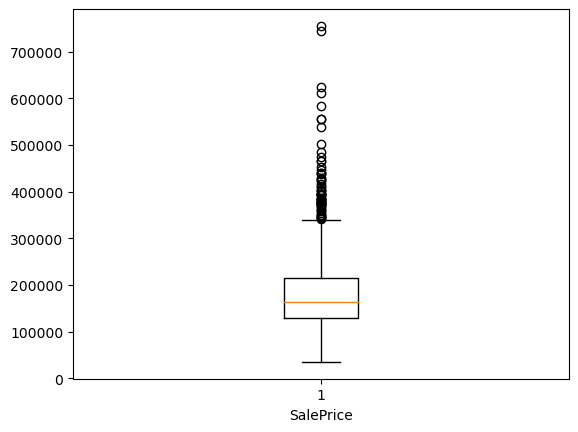

In [4]:
# describe and make a boxplot of price (y), there are outliers
# df.SalePrice.describe()
plt.boxplot(df.SalePrice)
plt.xlabel('SalePrice')
plt.show()

In [5]:
# many nans to be handled (I decided to leave the columns with many nans since they are informative and may influence the price)
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [6]:
# the list of columns with nans
cols=list(df.columns[df.isna().any()])
cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence']

In [7]:
# fillna with medians (for numerical data) and most frequent (for categorical data)
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].value_counts().index[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt']=df['GarageYrBlt'].astype(int)
df['MasVnrArea']=df['MasVnrArea'].astype(int)
df['LotFrontage']=df['LotFrontage'].astype(int)

In [8]:
# the rest of the columns with nans are categorical and I'll group them to make the further treatment
list_cat_cols=list(df.columns[df.isna().any()])
for i in range(len(list_cat_cols)):
    df[list_cat_cols[i]]=df[list_cat_cols[i]].replace(np.nan, 'Zut')
    df[list_cat_cols[i]]=df[list_cat_cols[i]].astype('category')
    df[list_cat_cols[i]]=df[list_cat_cols[i]].cat.codes

In [9]:
# grouping the object columns to change them into categorical and then make coding to change the datatype to numerical
object_columns = list(df.select_dtypes(include=['object']).columns)
df1=df.select_dtypes(include=['object']).apply(lambda x: x.astype('category'))
df1=df1.apply(lambda x: x.cat.codes)
df.drop(columns=object_columns,axis=1,inplace=True)
df3=pd.concat([df,df1],axis=1)
df3.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
Alley            0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrType       0
MasVnrArea       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MoSold           0
YrSold           0
SalePrice        0
MSZoning         0
Street           0
LotShape    

In [10]:
# permutation of the data and splitting into x and y
dfr=pd.DataFrame(np.random.permutation(df3.values),columns=df3.columns)
x=dfr.loc[:,df3.columns!='SalePrice']
y=dfr.loc[:,df3.columns=='SalePrice']

In [11]:
# define rmse function 
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [12]:
# train_test split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [13]:
# standardize x data
scaler=StandardScaler()
scaler.fit(x)
X=scaler.transform(x)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
# tf.cast y to float32
Y=tf.cast(y, tf.float32)
Y_train=tf.cast(Y_train, tf.float32)
Y_test=tf.cast(Y_test, tf.float32)

In [15]:
# I've experimented with Sequential and Functional APIs, with different functions, and the last works better
# further I'll use the Functional APIs model with Relu function to build wide and deep neural networks
# Hidden1 layer is acting as a function where the input layer is passed on the output of the hidden1 is passed on to Hidden2
# Concat layer concatenates input layer and the output of the Hidden2 layer
# in the output layer, we have the raw input and transformed input by Hidden1&Hidden2 layers concatenated together
# because this is a regression problem, there will be only one output here
input = tf.keras.layers.Input(shape = X.shape[1:])
hidden1 = tf.keras.layers.Dense(300, activation='relu')(input)
hidden2 = tf.keras.layers.Dense(300, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([input, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model_final = tf.keras.models.Model(inputs=[input], outputs=[output])

In [16]:
# compilation of the model using rmse as loss, adam optimizer, and evaluation metric as rmse again
model_final.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

In [17]:
# running the model for 2000 epochs
final = model_final.fit(X_train, Y_train, epochs=2000, validation_data=(X_test, Y_test))

Epoch 1/2000
37/37 [==============================] - 1s 7ms/step - loss: 195593.3906 - rmse: 195338.9531 - val_loss: 201096.8438 - val_rmse: 204553.2500
Epoch 2/2000
37/37 [==============================] - 0s 3ms/step - loss: 195401.8281 - rmse: 195711.6562 - val_loss: 200581.5000 - val_rmse: 204010.4844
Epoch 3/2000
37/37 [==============================] - 0s 2ms/step - loss: 194256.1562 - rmse: 194608.7188 - val_loss: 198703.2969 - val_rmse: 202028.9688
Epoch 4/2000
37/37 [==============================] - 0s 2ms/step - loss: 191142.1250 - rmse: 190963.1406 - val_loss: 194218.0781 - val_rmse: 197296.4688
Epoch 5/2000
37/37 [==============================] - 0s 2ms/step - loss: 185267.9219 - rmse: 185104.5938 - val_loss: 185910.5000 - val_rmse: 188523.5781
Epoch 6/2000
37/37 [==============================] - 0s 2ms/step - loss: 174762.2812 - rmse: 174676.0000 - val_loss: 172884.5312 - val_rmse: 174795.0312
Epoch 7/2000
37/37 [==============================] - 0s 2ms/step - loss: 15

37/37 [==============================] - 0s 2ms/step - loss: 31095.1719 - rmse: 31046.6758 - val_loss: 36406.7148 - val_rmse: 34270.0469
Epoch 56/2000
37/37 [==============================] - 0s 2ms/step - loss: 30917.1367 - rmse: 30847.5820 - val_loss: 36086.7695 - val_rmse: 34022.2734
Epoch 57/2000
37/37 [==============================] - 0s 2ms/step - loss: 30658.9922 - rmse: 30644.7500 - val_loss: 36204.9180 - val_rmse: 34090.2734
Epoch 58/2000
37/37 [==============================] - 0s 2ms/step - loss: 30309.5957 - rmse: 30328.7969 - val_loss: 35796.0938 - val_rmse: 33830.5078
Epoch 59/2000
37/37 [==============================] - 0s 3ms/step - loss: 29589.8867 - rmse: 29406.8242 - val_loss: 35863.2227 - val_rmse: 33812.4141
Epoch 60/2000
37/37 [==============================] - 0s 2ms/step - loss: 29759.8008 - rmse: 29925.2598 - val_loss: 35573.1211 - val_rmse: 33550.9219
Epoch 61/2000
37/37 [==============================] - 0s 2ms/step - loss: 29527.5039 - rmse: 29444.1348 - v

37/37 [==============================] - 0s 2ms/step - loss: 23095.0508 - rmse: 22960.9668 - val_loss: 32764.5215 - val_rmse: 31029.2559
Epoch 110/2000
37/37 [==============================] - 0s 2ms/step - loss: 22721.0020 - rmse: 22632.1934 - val_loss: 32661.2090 - val_rmse: 30942.0977
Epoch 111/2000
37/37 [==============================] - 0s 2ms/step - loss: 22817.1465 - rmse: 22699.8262 - val_loss: 32631.4688 - val_rmse: 30881.0508
Epoch 112/2000
37/37 [==============================] - 0s 2ms/step - loss: 22146.8809 - rmse: 22073.2500 - val_loss: 32583.2500 - val_rmse: 30841.8340
Epoch 113/2000
37/37 [==============================] - 0s 2ms/step - loss: 22488.1934 - rmse: 22406.6836 - val_loss: 32386.1641 - val_rmse: 30816.2188
Epoch 114/2000
37/37 [==============================] - 0s 2ms/step - loss: 22462.6680 - rmse: 22308.8594 - val_loss: 32615.2461 - val_rmse: 30775.4434
Epoch 115/2000
37/37 [==============================] - 0s 2ms/step - loss: 22443.3281 - rmse: 22739.25

Epoch 163/2000
37/37 [==============================] - 0s 2ms/step - loss: 19615.2324 - rmse: 19742.3066 - val_loss: 31571.6738 - val_rmse: 30049.9102
Epoch 164/2000
37/37 [==============================] - 0s 2ms/step - loss: 19821.6777 - rmse: 20065.1484 - val_loss: 31495.7812 - val_rmse: 30007.8184
Epoch 165/2000
37/37 [==============================] - 0s 2ms/step - loss: 19447.8340 - rmse: 19480.9980 - val_loss: 31520.7461 - val_rmse: 29952.5996
Epoch 166/2000
37/37 [==============================] - 0s 2ms/step - loss: 19421.8301 - rmse: 19661.3809 - val_loss: 31580.2266 - val_rmse: 29995.1309
Epoch 167/2000
37/37 [==============================] - 0s 2ms/step - loss: 19457.2637 - rmse: 19583.5195 - val_loss: 31584.1309 - val_rmse: 30007.3086
Epoch 168/2000
37/37 [==============================] - 0s 2ms/step - loss: 19230.7598 - rmse: 19130.5176 - val_loss: 31484.4727 - val_rmse: 29963.2773
Epoch 169/2000
37/37 [==============================] - 0s 2ms/step - loss: 19558.6367 -

Epoch 217/2000
37/37 [==============================] - 0s 2ms/step - loss: 17721.6328 - rmse: 17611.9785 - val_loss: 31441.6270 - val_rmse: 29689.4805
Epoch 218/2000
37/37 [==============================] - 0s 2ms/step - loss: 17650.2344 - rmse: 17785.0996 - val_loss: 31065.1816 - val_rmse: 29592.0625
Epoch 219/2000
37/37 [==============================] - 0s 2ms/step - loss: 17921.6406 - rmse: 17904.9629 - val_loss: 30995.6992 - val_rmse: 29603.7695
Epoch 220/2000
37/37 [==============================] - 0s 2ms/step - loss: 17745.8867 - rmse: 17660.6582 - val_loss: 31300.7598 - val_rmse: 29710.3027
Epoch 221/2000
37/37 [==============================] - 0s 2ms/step - loss: 17672.4395 - rmse: 17594.2559 - val_loss: 31144.3555 - val_rmse: 29694.9414
Epoch 222/2000
37/37 [==============================] - 0s 2ms/step - loss: 17568.4375 - rmse: 17471.1230 - val_loss: 31146.9453 - val_rmse: 29658.6777
Epoch 223/2000
37/37 [==============================] - 0s 2ms/step - loss: 17508.2949 -

Epoch 271/2000
37/37 [==============================] - 0s 2ms/step - loss: 16309.3682 - rmse: 16219.9355 - val_loss: 31013.0371 - val_rmse: 29593.0156
Epoch 272/2000
37/37 [==============================] - 0s 2ms/step - loss: 16088.1768 - rmse: 17067.2598 - val_loss: 30982.6309 - val_rmse: 29628.3848
Epoch 273/2000
37/37 [==============================] - 0s 2ms/step - loss: 16358.0596 - rmse: 16612.5938 - val_loss: 30890.3809 - val_rmse: 29628.7188
Epoch 274/2000
37/37 [==============================] - 0s 2ms/step - loss: 16205.8643 - rmse: 16301.1533 - val_loss: 31056.5352 - val_rmse: 29640.1523
Epoch 275/2000
37/37 [==============================] - 0s 2ms/step - loss: 16190.6367 - rmse: 16375.6924 - val_loss: 30920.2051 - val_rmse: 29578.6465
Epoch 276/2000
37/37 [==============================] - 0s 2ms/step - loss: 16300.8340 - rmse: 16179.3311 - val_loss: 31128.5586 - val_rmse: 29701.3242
Epoch 277/2000
37/37 [==============================] - 0s 2ms/step - loss: 16299.1592 -

Epoch 325/2000
37/37 [==============================] - 0s 2ms/step - loss: 15398.7256 - rmse: 15319.0830 - val_loss: 30837.9902 - val_rmse: 29583.1523
Epoch 326/2000
37/37 [==============================] - 0s 2ms/step - loss: 15229.0088 - rmse: 15332.9492 - val_loss: 31054.8184 - val_rmse: 29624.9219
Epoch 327/2000
37/37 [==============================] - 0s 2ms/step - loss: 15199.8506 - rmse: 15213.2852 - val_loss: 30962.8047 - val_rmse: 29621.9844
Epoch 328/2000
37/37 [==============================] - 0s 3ms/step - loss: 15140.4639 - rmse: 15091.9277 - val_loss: 30820.9727 - val_rmse: 29564.8535
Epoch 329/2000
37/37 [==============================] - 0s 3ms/step - loss: 15067.5205 - rmse: 14958.4844 - val_loss: 30924.0039 - val_rmse: 29643.2754
Epoch 330/2000
37/37 [==============================] - 0s 2ms/step - loss: 15531.4893 - rmse: 15471.2705 - val_loss: 31146.2227 - val_rmse: 29745.3125
Epoch 331/2000
37/37 [==============================] - 0s 2ms/step - loss: 14833.1074 -

Epoch 379/2000
37/37 [==============================] - 0s 2ms/step - loss: 14333.5771 - rmse: 14392.4980 - val_loss: 31061.2363 - val_rmse: 29833.3594
Epoch 380/2000
37/37 [==============================] - 0s 2ms/step - loss: 14267.0254 - rmse: 14205.3477 - val_loss: 31202.5488 - val_rmse: 29825.8184
Epoch 381/2000
37/37 [==============================] - 0s 2ms/step - loss: 14152.3018 - rmse: 14109.3652 - val_loss: 31203.9590 - val_rmse: 29774.5938
Epoch 382/2000
37/37 [==============================] - 0s 2ms/step - loss: 14305.7139 - rmse: 14248.3359 - val_loss: 30874.1270 - val_rmse: 29690.6465
Epoch 383/2000
37/37 [==============================] - 0s 2ms/step - loss: 14207.6572 - rmse: 14181.9746 - val_loss: 31027.8223 - val_rmse: 29750.9277
Epoch 384/2000
37/37 [==============================] - 0s 2ms/step - loss: 14079.1650 - rmse: 14108.4971 - val_loss: 31094.9629 - val_rmse: 29798.8477
Epoch 385/2000
37/37 [==============================] - 0s 2ms/step - loss: 14123.6768 -

Epoch 433/2000
37/37 [==============================] - 0s 2ms/step - loss: 12915.7520 - rmse: 12828.4746 - val_loss: 31182.1465 - val_rmse: 29947.5586
Epoch 434/2000
37/37 [==============================] - 0s 2ms/step - loss: 13450.7793 - rmse: 13386.4326 - val_loss: 31194.1875 - val_rmse: 29951.7441
Epoch 435/2000
37/37 [==============================] - 0s 2ms/step - loss: 13291.9785 - rmse: 13324.5850 - val_loss: 31063.9824 - val_rmse: 30051.6758
Epoch 436/2000
37/37 [==============================] - 0s 2ms/step - loss: 13107.5059 - rmse: 13020.7744 - val_loss: 31020.8320 - val_rmse: 30015.1523
Epoch 437/2000
37/37 [==============================] - 0s 2ms/step - loss: 13045.3945 - rmse: 13041.8184 - val_loss: 31362.0508 - val_rmse: 30136.3945
Epoch 438/2000
37/37 [==============================] - 0s 2ms/step - loss: 13374.3574 - rmse: 13335.3281 - val_loss: 31407.6992 - val_rmse: 30133.0586
Epoch 439/2000
37/37 [==============================] - 0s 2ms/step - loss: 13281.1357 -

Epoch 487/2000
37/37 [==============================] - 0s 2ms/step - loss: 12443.8340 - rmse: 12486.3594 - val_loss: 31335.7988 - val_rmse: 30344.4258
Epoch 488/2000
37/37 [==============================] - 0s 2ms/step - loss: 12431.2979 - rmse: 12349.4297 - val_loss: 31307.1953 - val_rmse: 30359.5430
Epoch 489/2000
37/37 [==============================] - 0s 2ms/step - loss: 11775.8613 - rmse: 11816.4834 - val_loss: 31332.2578 - val_rmse: 30502.1133
Epoch 490/2000
37/37 [==============================] - 0s 3ms/step - loss: 12352.8096 - rmse: 12252.3203 - val_loss: 31430.2266 - val_rmse: 30394.3320
Epoch 491/2000
37/37 [==============================] - 0s 2ms/step - loss: 12067.0635 - rmse: 12031.3027 - val_loss: 31349.0723 - val_rmse: 30374.0684
Epoch 492/2000
37/37 [==============================] - 0s 2ms/step - loss: 12042.3945 - rmse: 12010.6699 - val_loss: 31304.1992 - val_rmse: 30465.7461
Epoch 493/2000
37/37 [==============================] - 0s 2ms/step - loss: 12518.0381 -

Epoch 541/2000
37/37 [==============================] - 0s 2ms/step - loss: 11527.9619 - rmse: 11437.6738 - val_loss: 31810.1094 - val_rmse: 30719.0059
Epoch 542/2000
37/37 [==============================] - 0s 2ms/step - loss: 11661.0293 - rmse: 11590.7578 - val_loss: 31722.8535 - val_rmse: 30745.1973
Epoch 543/2000
37/37 [==============================] - 0s 2ms/step - loss: 11562.8916 - rmse: 11535.9502 - val_loss: 31700.9590 - val_rmse: 30730.9785
Epoch 544/2000
37/37 [==============================] - 0s 2ms/step - loss: 11435.1875 - rmse: 11411.4990 - val_loss: 31600.2090 - val_rmse: 30708.0820
Epoch 545/2000
37/37 [==============================] - 0s 2ms/step - loss: 11168.6133 - rmse: 11123.9189 - val_loss: 31673.8359 - val_rmse: 30748.8320
Epoch 546/2000
37/37 [==============================] - 0s 2ms/step - loss: 11319.2744 - rmse: 11248.9697 - val_loss: 31609.2539 - val_rmse: 30688.4531
Epoch 547/2000
37/37 [==============================] - 0s 2ms/step - loss: 11303.7920 -

Epoch 595/2000
37/37 [==============================] - 0s 2ms/step - loss: 10457.7920 - rmse: 10395.1592 - val_loss: 32237.4902 - val_rmse: 31182.0996
Epoch 596/2000
37/37 [==============================] - 0s 2ms/step - loss: 10665.2305 - rmse: 10588.0186 - val_loss: 31876.1602 - val_rmse: 31081.8965
Epoch 597/2000
37/37 [==============================] - 0s 2ms/step - loss: 10476.6855 - rmse: 10543.7285 - val_loss: 31912.6035 - val_rmse: 31018.5938
Epoch 598/2000
37/37 [==============================] - 0s 2ms/step - loss: 10850.9033 - rmse: 10824.6152 - val_loss: 31955.1055 - val_rmse: 31121.3965
Epoch 599/2000
37/37 [==============================] - 0s 2ms/step - loss: 10574.4062 - rmse: 10509.3076 - val_loss: 31931.5371 - val_rmse: 31175.4316
Epoch 600/2000
37/37 [==============================] - 0s 2ms/step - loss: 10045.6582 - rmse: 10273.2920 - val_loss: 31960.8867 - val_rmse: 31152.6914
Epoch 601/2000
37/37 [==============================] - 0s 2ms/step - loss: 10583.6182 -

37/37 [==============================] - 0s 2ms/step - loss: 9683.9688 - rmse: 9685.2090 - val_loss: 32216.6875 - val_rmse: 31512.8008
Epoch 650/2000
37/37 [==============================] - 0s 2ms/step - loss: 9685.5088 - rmse: 9841.8604 - val_loss: 32435.2871 - val_rmse: 31864.8281
Epoch 651/2000
37/37 [==============================] - 0s 2ms/step - loss: 9674.2119 - rmse: 9644.2051 - val_loss: 32284.0488 - val_rmse: 31639.3906
Epoch 652/2000
37/37 [==============================] - 0s 2ms/step - loss: 9456.7949 - rmse: 9395.6484 - val_loss: 32350.8223 - val_rmse: 31793.4629
Epoch 653/2000
37/37 [==============================] - 0s 2ms/step - loss: 9637.6992 - rmse: 9860.1689 - val_loss: 32356.3672 - val_rmse: 31628.8809
Epoch 654/2000
37/37 [==============================] - 0s 2ms/step - loss: 9321.0732 - rmse: 9284.5127 - val_loss: 32527.6309 - val_rmse: 31660.7227
Epoch 655/2000
37/37 [==============================] - 0s 2ms/step - loss: 9440.6514 - rmse: 9450.6797 - val_loss:

Epoch 704/2000
37/37 [==============================] - 0s 2ms/step - loss: 8210.7148 - rmse: 8157.6992 - val_loss: 32841.0117 - val_rmse: 32255.6289
Epoch 705/2000
37/37 [==============================] - 0s 2ms/step - loss: 8661.1455 - rmse: 8592.9717 - val_loss: 32690.1543 - val_rmse: 32010.2031
Epoch 706/2000
37/37 [==============================] - 0s 2ms/step - loss: 8538.1514 - rmse: 8538.4785 - val_loss: 32847.8516 - val_rmse: 32432.7969
Epoch 707/2000
37/37 [==============================] - 0s 2ms/step - loss: 8577.1719 - rmse: 8769.3154 - val_loss: 32705.5781 - val_rmse: 32175.6445
Epoch 708/2000
37/37 [==============================] - 0s 2ms/step - loss: 8265.1768 - rmse: 8305.2803 - val_loss: 32807.6914 - val_rmse: 32370.8633
Epoch 709/2000
37/37 [==============================] - 0s 2ms/step - loss: 8181.2407 - rmse: 8125.9536 - val_loss: 32751.1035 - val_rmse: 32162.9023
Epoch 710/2000
37/37 [==============================] - 0s 2ms/step - loss: 8558.0605 - rmse: 8522.1

37/37 [==============================] - 0s 2ms/step - loss: 7466.0137 - rmse: 7440.9419 - val_loss: 33436.2070 - val_rmse: 33034.4648
Epoch 759/2000
37/37 [==============================] - 0s 2ms/step - loss: 7466.2275 - rmse: 7524.7246 - val_loss: 33285.3672 - val_rmse: 32725.6973
Epoch 760/2000
37/37 [==============================] - 0s 2ms/step - loss: 7492.4897 - rmse: 7453.3784 - val_loss: 33424.0664 - val_rmse: 32911.5977
Epoch 761/2000
37/37 [==============================] - 0s 2ms/step - loss: 7463.6567 - rmse: 7437.8647 - val_loss: 33322.8750 - val_rmse: 32955.2969
Epoch 762/2000
37/37 [==============================] - 0s 2ms/step - loss: 7433.3853 - rmse: 7407.1953 - val_loss: 33428.1719 - val_rmse: 32976.4023
Epoch 763/2000
37/37 [==============================] - 0s 2ms/step - loss: 7280.8003 - rmse: 7234.7163 - val_loss: 33397.7969 - val_rmse: 32893.2266
Epoch 764/2000
37/37 [==============================] - 0s 2ms/step - loss: 7367.6206 - rmse: 7323.0767 - val_loss:

Epoch 813/2000
37/37 [==============================] - 0s 2ms/step - loss: 6436.4575 - rmse: 6404.2578 - val_loss: 33902.5703 - val_rmse: 33401.0156
Epoch 814/2000
37/37 [==============================] - 0s 2ms/step - loss: 6179.4902 - rmse: 6124.7686 - val_loss: 34109.7383 - val_rmse: 33658.4453
Epoch 815/2000
37/37 [==============================] - 0s 2ms/step - loss: 6462.4146 - rmse: 6404.7798 - val_loss: 34075.5039 - val_rmse: 33532.6680
Epoch 816/2000
37/37 [==============================] - 0s 2ms/step - loss: 6415.9150 - rmse: 6405.9048 - val_loss: 34184.8477 - val_rmse: 33655.2773
Epoch 817/2000
37/37 [==============================] - 0s 2ms/step - loss: 6239.3843 - rmse: 6257.9966 - val_loss: 34212.3359 - val_rmse: 33973.9258
Epoch 818/2000
37/37 [==============================] - 0s 2ms/step - loss: 6346.4141 - rmse: 6415.7632 - val_loss: 34112.7695 - val_rmse: 33669.7539
Epoch 819/2000
37/37 [==============================] - 0s 2ms/step - loss: 6202.8257 - rmse: 6161.3

37/37 [==============================] - 0s 2ms/step - loss: 5063.4570 - rmse: 5022.9268 - val_loss: 34864.6523 - val_rmse: 34335.6289
Epoch 868/2000
37/37 [==============================] - 0s 2ms/step - loss: 5201.3901 - rmse: 5166.9814 - val_loss: 34927.9805 - val_rmse: 34607.6523
Epoch 869/2000
37/37 [==============================] - 0s 2ms/step - loss: 5228.0850 - rmse: 5221.2046 - val_loss: 34646.1641 - val_rmse: 34258.9609
Epoch 870/2000
37/37 [==============================] - 0s 2ms/step - loss: 5346.8662 - rmse: 5298.9717 - val_loss: 34974.8867 - val_rmse: 34598.2695
Epoch 871/2000
37/37 [==============================] - 0s 2ms/step - loss: 5061.0054 - rmse: 5036.8091 - val_loss: 34852.7695 - val_rmse: 34641.5312
Epoch 872/2000
37/37 [==============================] - 0s 2ms/step - loss: 5030.5278 - rmse: 4982.8252 - val_loss: 34855.8555 - val_rmse: 34368.2539
Epoch 873/2000
37/37 [==============================] - 0s 2ms/step - loss: 5021.1406 - rmse: 4994.9331 - val_loss:

Epoch 922/2000
37/37 [==============================] - 0s 2ms/step - loss: 4122.5615 - rmse: 4113.6499 - val_loss: 35419.6719 - val_rmse: 35007.1719
Epoch 923/2000
37/37 [==============================] - 0s 2ms/step - loss: 4024.5544 - rmse: 4002.9421 - val_loss: 35479.8555 - val_rmse: 35158.8555
Epoch 924/2000
37/37 [==============================] - 0s 2ms/step - loss: 4255.8428 - rmse: 4237.0723 - val_loss: 35563.5859 - val_rmse: 35092.8633
Epoch 925/2000
37/37 [==============================] - 0s 2ms/step - loss: 3994.0176 - rmse: 3993.8623 - val_loss: 35633.3164 - val_rmse: 35432.3828
Epoch 926/2000
37/37 [==============================] - 0s 2ms/step - loss: 4144.5264 - rmse: 4117.0479 - val_loss: 35560.4062 - val_rmse: 35330.5312
Epoch 927/2000
37/37 [==============================] - 0s 2ms/step - loss: 4105.4492 - rmse: 4077.7788 - val_loss: 35510.3359 - val_rmse: 35105.1641
Epoch 928/2000
37/37 [==============================] - 0s 2ms/step - loss: 4003.5693 - rmse: 3969.9

37/37 [==============================] - 0s 2ms/step - loss: 2975.7583 - rmse: 2985.4900 - val_loss: 36278.9531 - val_rmse: 35929.7969
Epoch 977/2000
37/37 [==============================] - 0s 2ms/step - loss: 3027.1536 - rmse: 3013.3145 - val_loss: 36039.9297 - val_rmse: 35755.8828
Epoch 978/2000
37/37 [==============================] - 0s 2ms/step - loss: 2964.8047 - rmse: 2978.2839 - val_loss: 36257.7070 - val_rmse: 36102.3125
Epoch 979/2000
37/37 [==============================] - 0s 2ms/step - loss: 2994.5715 - rmse: 2986.2227 - val_loss: 36113.7305 - val_rmse: 35856.3359
Epoch 980/2000
37/37 [==============================] - 0s 2ms/step - loss: 2937.7769 - rmse: 2922.8521 - val_loss: 36210.4531 - val_rmse: 35934.6641
Epoch 981/2000
37/37 [==============================] - 0s 2ms/step - loss: 2954.9297 - rmse: 2993.0771 - val_loss: 36101.1719 - val_rmse: 35906.4609
Epoch 982/2000
37/37 [==============================] - 0s 2ms/step - loss: 2917.9541 - rmse: 2906.6333 - val_loss:

37/37 [==============================] - 0s 2ms/step - loss: 2286.2346 - rmse: 2286.3569 - val_loss: 36672.3750 - val_rmse: 36560.3008
Epoch 1031/2000
37/37 [==============================] - 0s 2ms/step - loss: 2320.3059 - rmse: 2310.8225 - val_loss: 36503.1133 - val_rmse: 36287.1406
Epoch 1032/2000
37/37 [==============================] - 0s 2ms/step - loss: 2254.7883 - rmse: 2241.5540 - val_loss: 36643.9453 - val_rmse: 36416.4570
Epoch 1033/2000
37/37 [==============================] - 0s 2ms/step - loss: 2183.9409 - rmse: 2183.4702 - val_loss: 36537.5977 - val_rmse: 36246.5352
Epoch 1034/2000
37/37 [==============================] - 0s 2ms/step - loss: 2184.8691 - rmse: 2186.4355 - val_loss: 36610.2422 - val_rmse: 36306.7422
Epoch 1035/2000
37/37 [==============================] - 0s 2ms/step - loss: 2157.3584 - rmse: 2166.5955 - val_loss: 36623.5312 - val_rmse: 36393.4375
Epoch 1036/2000
37/37 [==============================] - 0s 2ms/step - loss: 2035.0548 - rmse: 2022.4493 - val

37/37 [==============================] - 0s 2ms/step - loss: 1698.2678 - rmse: 1683.4128 - val_loss: 36849.9180 - val_rmse: 36536.0039
Epoch 1085/2000
37/37 [==============================] - 0s 2ms/step - loss: 1609.6061 - rmse: 1636.3571 - val_loss: 37016.3984 - val_rmse: 36817.8203
Epoch 1086/2000
37/37 [==============================] - 0s 2ms/step - loss: 1550.1775 - rmse: 1543.5153 - val_loss: 36968.5703 - val_rmse: 36732.0312
Epoch 1087/2000
37/37 [==============================] - 0s 2ms/step - loss: 1547.4191 - rmse: 1562.1191 - val_loss: 37057.4023 - val_rmse: 36784.8828
Epoch 1088/2000
37/37 [==============================] - 0s 2ms/step - loss: 1571.8496 - rmse: 1558.2633 - val_loss: 36824.9297 - val_rmse: 36631.3242
Epoch 1089/2000
37/37 [==============================] - 0s 2ms/step - loss: 1629.9795 - rmse: 1634.0526 - val_loss: 37098.8477 - val_rmse: 36821.3203
Epoch 1090/2000
37/37 [==============================] - 0s 2ms/step - loss: 1509.3604 - rmse: 1497.6356 - val

37/37 [==============================] - 0s 2ms/step - loss: 1126.4086 - rmse: 1145.8817 - val_loss: 37263.2930 - val_rmse: 36962.4336
Epoch 1139/2000
37/37 [==============================] - 0s 2ms/step - loss: 1181.9219 - rmse: 1185.6387 - val_loss: 37264.0234 - val_rmse: 36839.3711
Epoch 1140/2000
37/37 [==============================] - 0s 2ms/step - loss: 1059.9471 - rmse: 1100.2852 - val_loss: 37297.0430 - val_rmse: 37016.1484
Epoch 1141/2000
37/37 [==============================] - 0s 2ms/step - loss: 1086.6534 - rmse: 1083.7100 - val_loss: 37251.5156 - val_rmse: 36927.3906
Epoch 1142/2000
37/37 [==============================] - 0s 2ms/step - loss: 1014.5070 - rmse: 1009.1807 - val_loss: 37409.7383 - val_rmse: 37083.6484
Epoch 1143/2000
37/37 [==============================] - 0s 2ms/step - loss: 1112.5475 - rmse: 1115.4907 - val_loss: 37338.2070 - val_rmse: 37002.5703
Epoch 1144/2000
37/37 [==============================] - 0s 2ms/step - loss: 1074.5148 - rmse: 1068.9707 - val

Epoch 1193/2000
37/37 [==============================] - 0s 2ms/step - loss: 777.0712 - rmse: 773.9399 - val_loss: 37531.6523 - val_rmse: 37091.7227
Epoch 1194/2000
37/37 [==============================] - 0s 2ms/step - loss: 771.2182 - rmse: 764.2590 - val_loss: 37421.7891 - val_rmse: 37026.8828
Epoch 1195/2000
37/37 [==============================] - 0s 2ms/step - loss: 844.2742 - rmse: 838.9630 - val_loss: 37516.5195 - val_rmse: 37073.7109
Epoch 1196/2000
37/37 [==============================] - 0s 2ms/step - loss: 779.0462 - rmse: 778.1218 - val_loss: 37496.1523 - val_rmse: 37054.1836
Epoch 1197/2000
37/37 [==============================] - 0s 2ms/step - loss: 778.5781 - rmse: 775.1359 - val_loss: 37535.4219 - val_rmse: 37124.4805
Epoch 1198/2000
37/37 [==============================] - 0s 2ms/step - loss: 801.5544 - rmse: 803.0230 - val_loss: 37540.1641 - val_rmse: 37111.0000
Epoch 1199/2000
37/37 [==============================] - 0s 2ms/step - loss: 819.9839 - rmse: 823.3099 - v

Epoch 1248/2000
37/37 [==============================] - 0s 2ms/step - loss: 698.5861 - rmse: 701.2528 - val_loss: 37725.5508 - val_rmse: 37228.5234
Epoch 1249/2000
37/37 [==============================] - 0s 2ms/step - loss: 693.5710 - rmse: 690.4905 - val_loss: 37549.7031 - val_rmse: 37089.6367
Epoch 1250/2000
37/37 [==============================] - 0s 3ms/step - loss: 676.3061 - rmse: 676.1954 - val_loss: 37624.5508 - val_rmse: 37147.3945
Epoch 1251/2000
37/37 [==============================] - 0s 2ms/step - loss: 693.5593 - rmse: 697.1267 - val_loss: 37703.7148 - val_rmse: 37212.2383
Epoch 1252/2000
37/37 [==============================] - 0s 2ms/step - loss: 637.8595 - rmse: 634.4573 - val_loss: 37676.2734 - val_rmse: 37221.8320
Epoch 1253/2000
37/37 [==============================] - 0s 2ms/step - loss: 678.0706 - rmse: 677.3631 - val_loss: 37664.5430 - val_rmse: 37243.1172
Epoch 1254/2000
37/37 [==============================] - 0s 2ms/step - loss: 645.7706 - rmse: 648.4491 - v

Epoch 1303/2000
37/37 [==============================] - 0s 2ms/step - loss: 742.9954 - rmse: 749.7059 - val_loss: 37733.7734 - val_rmse: 37253.5195
Epoch 1304/2000
37/37 [==============================] - 0s 2ms/step - loss: 729.6413 - rmse: 728.8889 - val_loss: 37618.7227 - val_rmse: 37152.9609
Epoch 1305/2000
37/37 [==============================] - 0s 2ms/step - loss: 647.8813 - rmse: 645.0764 - val_loss: 37653.2383 - val_rmse: 37173.5078
Epoch 1306/2000
37/37 [==============================] - 0s 2ms/step - loss: 623.5923 - rmse: 621.9565 - val_loss: 37583.5547 - val_rmse: 37130.0703
Epoch 1307/2000
37/37 [==============================] - 0s 2ms/step - loss: 605.3448 - rmse: 622.3312 - val_loss: 37709.4023 - val_rmse: 37283.7852
Epoch 1308/2000
37/37 [==============================] - 0s 2ms/step - loss: 622.4474 - rmse: 623.0005 - val_loss: 37602.5703 - val_rmse: 37133.8789
Epoch 1309/2000
37/37 [==============================] - 0s 2ms/step - loss: 609.4084 - rmse: 612.2590 - v

Epoch 1358/2000
37/37 [==============================] - 0s 2ms/step - loss: 608.4940 - rmse: 609.4146 - val_loss: 37753.0547 - val_rmse: 37341.9844
Epoch 1359/2000
37/37 [==============================] - 0s 2ms/step - loss: 638.1409 - rmse: 639.5193 - val_loss: 37643.4219 - val_rmse: 37156.3438
Epoch 1360/2000
37/37 [==============================] - 0s 2ms/step - loss: 567.1677 - rmse: 565.4736 - val_loss: 37662.2969 - val_rmse: 37207.2734
Epoch 1361/2000
37/37 [==============================] - 0s 2ms/step - loss: 607.1011 - rmse: 607.8530 - val_loss: 37695.0352 - val_rmse: 37205.2812
Epoch 1362/2000
37/37 [==============================] - 0s 2ms/step - loss: 553.7126 - rmse: 570.0818 - val_loss: 37666.2070 - val_rmse: 37186.7891
Epoch 1363/2000
37/37 [==============================] - 0s 2ms/step - loss: 574.9409 - rmse: 576.6037 - val_loss: 37681.0664 - val_rmse: 37197.3398
Epoch 1364/2000
37/37 [==============================] - 0s 2ms/step - loss: 633.6339 - rmse: 630.0264 - v

Epoch 1413/2000
37/37 [==============================] - 0s 2ms/step - loss: 654.9887 - rmse: 656.4354 - val_loss: 37577.4336 - val_rmse: 37063.3125
Epoch 1414/2000
37/37 [==============================] - 0s 2ms/step - loss: 609.9274 - rmse: 607.3622 - val_loss: 37741.6133 - val_rmse: 37254.5898
Epoch 1415/2000
37/37 [==============================] - 0s 2ms/step - loss: 580.6669 - rmse: 577.6046 - val_loss: 37576.9727 - val_rmse: 37186.6797
Epoch 1416/2000
37/37 [==============================] - 0s 2ms/step - loss: 654.2263 - rmse: 653.0074 - val_loss: 37665.7891 - val_rmse: 37142.3164
Epoch 1417/2000
37/37 [==============================] - 0s 2ms/step - loss: 553.7175 - rmse: 554.8578 - val_loss: 37664.9336 - val_rmse: 37186.8906
Epoch 1418/2000
37/37 [==============================] - 0s 2ms/step - loss: 614.9810 - rmse: 614.1048 - val_loss: 37645.1328 - val_rmse: 37198.5938
Epoch 1419/2000
37/37 [==============================] - 0s 2ms/step - loss: 568.1360 - rmse: 566.0032 - v

Epoch 1468/2000
37/37 [==============================] - 0s 2ms/step - loss: 527.9438 - rmse: 524.6540 - val_loss: 37658.1055 - val_rmse: 37230.9727
Epoch 1469/2000
37/37 [==============================] - 0s 2ms/step - loss: 617.7289 - rmse: 616.9258 - val_loss: 37668.2148 - val_rmse: 37192.7539
Epoch 1470/2000
37/37 [==============================] - 0s 2ms/step - loss: 604.3521 - rmse: 601.5449 - val_loss: 37626.7539 - val_rmse: 37142.8633
Epoch 1471/2000
37/37 [==============================] - 0s 2ms/step - loss: 620.9677 - rmse: 621.6699 - val_loss: 37722.9023 - val_rmse: 37327.9805
Epoch 1472/2000
37/37 [==============================] - 0s 2ms/step - loss: 588.3434 - rmse: 588.3398 - val_loss: 37545.3008 - val_rmse: 37101.1836
Epoch 1473/2000
37/37 [==============================] - 0s 2ms/step - loss: 606.8938 - rmse: 603.6919 - val_loss: 37694.9883 - val_rmse: 37241.8711
Epoch 1474/2000
37/37 [==============================] - 0s 2ms/step - loss: 642.1512 - rmse: 642.2463 - v

Epoch 1523/2000
37/37 [==============================] - 0s 2ms/step - loss: 527.1080 - rmse: 523.8036 - val_loss: 37551.8359 - val_rmse: 37103.9336
Epoch 1524/2000
37/37 [==============================] - 0s 2ms/step - loss: 589.5402 - rmse: 586.1596 - val_loss: 37605.1836 - val_rmse: 37202.0742
Epoch 1525/2000
37/37 [==============================] - 0s 2ms/step - loss: 558.0262 - rmse: 556.0556 - val_loss: 37574.2656 - val_rmse: 37108.5312
Epoch 1526/2000
37/37 [==============================] - 0s 2ms/step - loss: 617.5768 - rmse: 615.3771 - val_loss: 37569.9961 - val_rmse: 37100.8984
Epoch 1527/2000
37/37 [==============================] - 0s 2ms/step - loss: 601.0159 - rmse: 603.1940 - val_loss: 37674.7734 - val_rmse: 37181.5156
Epoch 1528/2000
37/37 [==============================] - 0s 2ms/step - loss: 550.0432 - rmse: 548.8113 - val_loss: 37612.1094 - val_rmse: 37207.9023
Epoch 1529/2000
37/37 [==============================] - 0s 2ms/step - loss: 607.3743 - rmse: 605.9663 - v

Epoch 1578/2000
37/37 [==============================] - 0s 2ms/step - loss: 615.1218 - rmse: 610.1556 - val_loss: 37602.5469 - val_rmse: 37166.6484
Epoch 1579/2000
37/37 [==============================] - 0s 2ms/step - loss: 625.1215 - rmse: 638.4084 - val_loss: 37792.4805 - val_rmse: 37345.0391
Epoch 1580/2000
37/37 [==============================] - 0s 2ms/step - loss: 605.3708 - rmse: 603.5787 - val_loss: 37692.2812 - val_rmse: 37223.5391
Epoch 1581/2000
37/37 [==============================] - 0s 2ms/step - loss: 511.0379 - rmse: 510.7030 - val_loss: 37620.0742 - val_rmse: 37144.8516
Epoch 1582/2000
37/37 [==============================] - 0s 2ms/step - loss: 594.8499 - rmse: 596.5851 - val_loss: 37477.5078 - val_rmse: 37006.9727
Epoch 1583/2000
37/37 [==============================] - 0s 2ms/step - loss: 619.6768 - rmse: 617.6260 - val_loss: 37726.6719 - val_rmse: 37247.6172
Epoch 1584/2000
37/37 [==============================] - 0s 2ms/step - loss: 727.6550 - rmse: 734.1362 - v

Epoch 1633/2000
37/37 [==============================] - 0s 2ms/step - loss: 524.4384 - rmse: 521.3152 - val_loss: 37536.0547 - val_rmse: 37118.3203
Epoch 1634/2000
37/37 [==============================] - 0s 2ms/step - loss: 570.3883 - rmse: 571.1846 - val_loss: 37618.5078 - val_rmse: 37186.2070
Epoch 1635/2000
37/37 [==============================] - 0s 2ms/step - loss: 569.0219 - rmse: 568.7221 - val_loss: 37600.4375 - val_rmse: 37191.9805
Epoch 1636/2000
37/37 [==============================] - 0s 2ms/step - loss: 658.0117 - rmse: 655.5471 - val_loss: 37556.3867 - val_rmse: 37102.9102
Epoch 1637/2000
37/37 [==============================] - 0s 2ms/step - loss: 545.4070 - rmse: 541.9095 - val_loss: 37522.7188 - val_rmse: 37081.2969
Epoch 1638/2000
37/37 [==============================] - 0s 2ms/step - loss: 524.6035 - rmse: 522.3381 - val_loss: 37597.7109 - val_rmse: 37183.2891
Epoch 1639/2000
37/37 [==============================] - 0s 2ms/step - loss: 614.8444 - rmse: 628.6271 - v

Epoch 1688/2000
37/37 [==============================] - 0s 2ms/step - loss: 695.7874 - rmse: 694.1578 - val_loss: 37524.6836 - val_rmse: 37125.6328
Epoch 1689/2000
37/37 [==============================] - 0s 2ms/step - loss: 635.3794 - rmse: 632.0167 - val_loss: 37600.9336 - val_rmse: 37121.5391
Epoch 1690/2000
37/37 [==============================] - 0s 2ms/step - loss: 636.5988 - rmse: 634.8052 - val_loss: 37582.2383 - val_rmse: 37100.7070
Epoch 1691/2000
37/37 [==============================] - 0s 2ms/step - loss: 601.7854 - rmse: 599.7604 - val_loss: 37647.2930 - val_rmse: 37218.0273
Epoch 1692/2000
37/37 [==============================] - 0s 2ms/step - loss: 552.1358 - rmse: 549.0941 - val_loss: 37576.6250 - val_rmse: 37120.5039
Epoch 1693/2000
37/37 [==============================] - 0s 2ms/step - loss: 543.9936 - rmse: 543.0648 - val_loss: 37613.9766 - val_rmse: 37197.8203
Epoch 1694/2000
37/37 [==============================] - 0s 2ms/step - loss: 614.2161 - rmse: 616.1917 - v

Epoch 1743/2000
37/37 [==============================] - 0s 2ms/step - loss: 656.9429 - rmse: 667.6284 - val_loss: 37573.6523 - val_rmse: 37102.7461
Epoch 1744/2000
37/37 [==============================] - 0s 2ms/step - loss: 624.5038 - rmse: 625.1776 - val_loss: 37615.8281 - val_rmse: 37157.3555
Epoch 1745/2000
37/37 [==============================] - 0s 2ms/step - loss: 562.3630 - rmse: 559.6136 - val_loss: 37509.6367 - val_rmse: 37073.7070
Epoch 1746/2000
37/37 [==============================] - 0s 2ms/step - loss: 640.1476 - rmse: 639.5244 - val_loss: 37573.9844 - val_rmse: 37077.7695
Epoch 1747/2000
37/37 [==============================] - 0s 2ms/step - loss: 542.1985 - rmse: 548.6900 - val_loss: 37572.7383 - val_rmse: 37179.9961
Epoch 1748/2000
37/37 [==============================] - 0s 2ms/step - loss: 528.3284 - rmse: 527.3884 - val_loss: 37587.1367 - val_rmse: 37158.1016
Epoch 1749/2000
37/37 [==============================] - 0s 2ms/step - loss: 521.7255 - rmse: 521.7787 - v

Epoch 1798/2000
37/37 [==============================] - 0s 2ms/step - loss: 588.6608 - rmse: 585.7070 - val_loss: 37626.8438 - val_rmse: 37157.1250
Epoch 1799/2000
37/37 [==============================] - 0s 2ms/step - loss: 602.5543 - rmse: 606.6536 - val_loss: 37408.8438 - val_rmse: 36988.1367
Epoch 1800/2000
37/37 [==============================] - 0s 2ms/step - loss: 604.0121 - rmse: 601.0410 - val_loss: 37588.2734 - val_rmse: 37120.4453
Epoch 1801/2000
37/37 [==============================] - 0s 2ms/step - loss: 666.8876 - rmse: 662.0828 - val_loss: 37548.9297 - val_rmse: 37093.3789
Epoch 1802/2000
37/37 [==============================] - 0s 2ms/step - loss: 592.1115 - rmse: 590.9663 - val_loss: 37544.9375 - val_rmse: 37090.4219
Epoch 1803/2000
37/37 [==============================] - 0s 3ms/step - loss: 604.9533 - rmse: 600.4599 - val_loss: 37556.1875 - val_rmse: 37083.7578
Epoch 1804/2000
37/37 [==============================] - 0s 2ms/step - loss: 515.6509 - rmse: 530.6763 - v

Epoch 1853/2000
37/37 [==============================] - 0s 3ms/step - loss: 623.5934 - rmse: 623.7591 - val_loss: 37513.1055 - val_rmse: 37092.6250
Epoch 1854/2000
37/37 [==============================] - 0s 3ms/step - loss: 626.3252 - rmse: 624.6186 - val_loss: 37524.0352 - val_rmse: 37059.3320
Epoch 1855/2000
37/37 [==============================] - 0s 2ms/step - loss: 570.8333 - rmse: 582.8232 - val_loss: 37493.9023 - val_rmse: 37003.1211
Epoch 1856/2000
37/37 [==============================] - 0s 2ms/step - loss: 566.0546 - rmse: 564.8716 - val_loss: 37502.8125 - val_rmse: 37083.3203
Epoch 1857/2000
37/37 [==============================] - 0s 2ms/step - loss: 563.5771 - rmse: 563.4467 - val_loss: 37557.2617 - val_rmse: 37129.9414
Epoch 1858/2000
37/37 [==============================] - 0s 2ms/step - loss: 575.6375 - rmse: 573.3444 - val_loss: 37479.6484 - val_rmse: 37059.4688
Epoch 1859/2000
37/37 [==============================] - 0s 2ms/step - loss: 545.3326 - rmse: 543.8417 - v

Epoch 1908/2000
37/37 [==============================] - 0s 2ms/step - loss: 632.2574 - rmse: 630.7354 - val_loss: 37525.6445 - val_rmse: 37124.1289
Epoch 1909/2000
37/37 [==============================] - 0s 2ms/step - loss: 624.5816 - rmse: 621.9437 - val_loss: 37463.6797 - val_rmse: 37042.8008
Epoch 1910/2000
37/37 [==============================] - 0s 2ms/step - loss: 599.6907 - rmse: 598.2561 - val_loss: 37585.0117 - val_rmse: 37150.1914
Epoch 1911/2000
37/37 [==============================] - 0s 2ms/step - loss: 606.3635 - rmse: 604.9201 - val_loss: 37581.6641 - val_rmse: 37158.9453
Epoch 1912/2000
37/37 [==============================] - 0s 2ms/step - loss: 546.6255 - rmse: 543.9917 - val_loss: 37532.7969 - val_rmse: 37077.4766
Epoch 1913/2000
37/37 [==============================] - 0s 2ms/step - loss: 530.0545 - rmse: 527.7535 - val_loss: 37554.1523 - val_rmse: 37170.8047
Epoch 1914/2000
37/37 [==============================] - 0s 2ms/step - loss: 621.0027 - rmse: 623.8134 - v

Epoch 1963/2000
37/37 [==============================] - 0s 2ms/step - loss: 529.5195 - rmse: 531.3147 - val_loss: 37551.5000 - val_rmse: 37130.7383
Epoch 1964/2000
37/37 [==============================] - 0s 2ms/step - loss: 539.0225 - rmse: 539.0205 - val_loss: 37526.0977 - val_rmse: 37084.6875
Epoch 1965/2000
37/37 [==============================] - 0s 2ms/step - loss: 601.4772 - rmse: 598.1266 - val_loss: 37538.1133 - val_rmse: 37045.5781
Epoch 1966/2000
37/37 [==============================] - 0s 2ms/step - loss: 595.0383 - rmse: 594.5236 - val_loss: 37485.5156 - val_rmse: 37046.8984
Epoch 1967/2000
37/37 [==============================] - 0s 2ms/step - loss: 583.1573 - rmse: 581.0497 - val_loss: 37513.4648 - val_rmse: 37081.9258
Epoch 1968/2000
37/37 [==============================] - 0s 2ms/step - loss: 582.8984 - rmse: 579.7360 - val_loss: 37462.5312 - val_rmse: 37035.8242
Epoch 1969/2000
37/37 [==============================] - 0s 2ms/step - loss: 562.2769 - rmse: 562.7493 - v

In [18]:
# the results of the last epoch for the test data (since the dataset is small I didn't make the additional validation split)
# rmse for the test data is significantly higher vs that of the train data - it's an overfiiting of the model
model_final.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 37515.4062 - rmse: 37120.6797


[37515.40625, 37120.6796875]

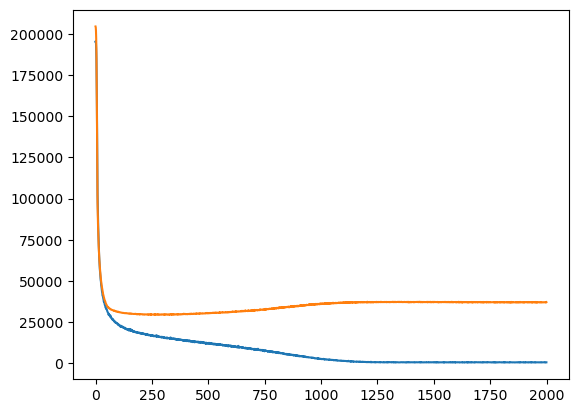

In [19]:
# plotting the history of epochs for rmse(test) and rmse(train)
# the optimal threshold of epochs makes 500 to train the model
plt.plot(final.history['rmse'])
plt.plot(final.history['val_rmse'])
plt.show()

In [23]:
# making predictions for all x and calculating rmse (744)
predictions=model_final.predict(X)
rmse(Y,predictions)

46/46 [==============================] - 0s 909us/step


<tf.Tensor: shape=(), dtype=float32, numpy=19437.24>

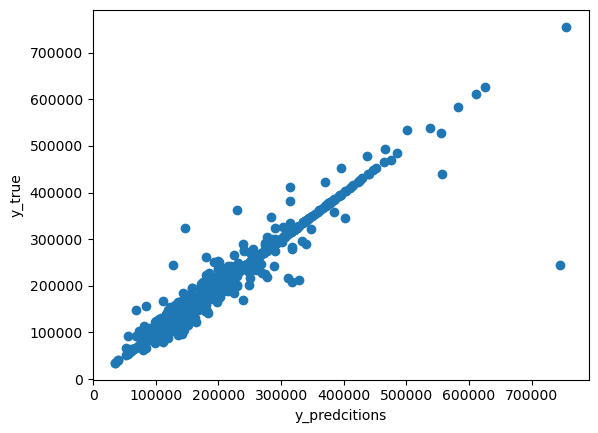

In [24]:
# plotting the final results
plt.scatter(Y,predictions)
plt.xlabel('y_predcitions')
plt.ylabel('y_true')
plt.show()